In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvMoSa

In [2]:

image_org = cv2.imread('input/puma.jpg')
image_dice = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
image_Blur = cv2.medianBlur(image_dice, 7)
_, image_thresh = cv2.threshold(image_Blur, 180, 255, cv2.THRESH_BINARY)
contours, hierarch = cv2.findContours(image_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

cv2 Area: 21256.5
21146
cvMoSa area: 21146


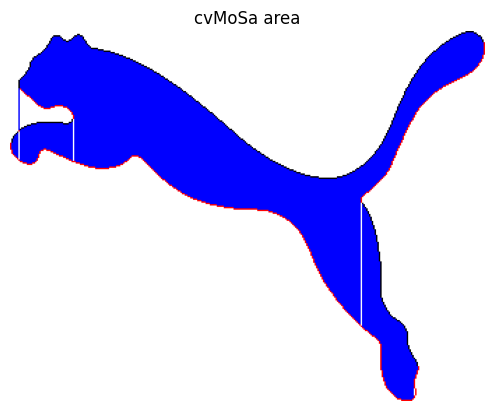

In [80]:
n = 9
contourM = contours[n]
print('cv2 Area:' ,cv2.contourArea(contourM))

x, y, w, h = cvMoSa.boundingRectMoSa(contours[n])
contourM_ = contourM[:,0].tolist()

area = 0
points = []
for i in range(x, x+w):
    cross = 0
    temp_area = 0
    temp_points = []
    # last_state = [i, 0] in contourM_
    last_state = False
    for j in range(y, y+h):
        if ([i, j] in contourM_):
            if not last_state:
                cross +=1
            last_state = True
        else:
            last_state = False
        if cross % 2 == 1:
            temp_area +=1
            temp_points.append([i,j])
        else:
            if(temp_area):
                for k in range(temp_area):
                    points.append(temp_points[k])
            area += temp_area
            temp_area = 0
            temp_points = []

# area, points = cvMoSa.contourAreaMoSa(contourM)
image = np.ones((h,w,3),dtype= np.uint8)*255
contourM = contourM[:,0]
for con in contourM:
    image[con[1]-y,con[0]-x,1:3] = 0
for con in points:
    image[con[1]-y,con[0]-x,0:2] = 0

print(len(points))
print('cvMoSa area:' ,area)
plt.imshow(image)
plt.title('cvMoSa area')
plt.axis('off')
plt.show()

In [63]:
print(points)

[[[364, 93], [364, 94], [364, 95], [364, 96], [364, 97], [364, 98], [364, 99], [364, 100]], [[365, 91], [365, 92], [365, 93], [365, 94], [365, 95], [365, 96], [365, 97], [365, 98], [365, 99], [365, 100], [365, 101], [365, 102], [365, 103]], [[366, 90], [366, 91], [366, 92], [366, 93], [366, 94], [366, 95], [366, 96], [366, 97], [366, 98], [366, 99], [366, 100], [366, 101], [366, 102], [366, 103], [366, 104]], [[367, 89], [367, 90], [367, 91], [367, 92], [367, 93], [367, 94], [367, 95], [367, 96], [367, 97], [367, 98], [367, 99], [367, 100], [367, 101], [367, 102], [367, 103], [367, 104], [367, 105]], [[368, 88], [368, 89], [368, 90], [368, 91], [368, 92], [368, 93], [368, 94], [368, 95], [368, 96], [368, 97], [368, 98], [368, 99], [368, 100], [368, 101], [368, 102], [368, 103], [368, 104], [368, 105], [368, 106]], [[369, 51], [369, 52], [369, 53], [369, 54], [369, 55], [369, 56], [369, 57], [369, 58], [369, 59], [369, 60], [369, 61], [369, 62], [369, 63], [369, 64], [369, 65], [369, 66